In [249]:
import numpy as np
import requests
import pandas as pd
import json

import matplotlib
import matplotlib.pyplot as plt
import scipy

import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [250]:
print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"scipy=={scipy.__version__}")

numpy==2.1.3
pandas==2.2.3
matplotlib==3.10.0
scipy==1.16.3


In [251]:
#21. Correlación playcount vs listeners (artistas)

In [252]:
# Cargar datos
df =  pd.read_csv("../Proyecto/top_tracks_1.csv")

# Agregar por artista
artist_agg = (
    df.groupby("artist", as_index=False)
      .agg(
          total_playcount=("playcount", "sum"),
          total_listeners=("listeners", "sum"),
          tracks=("name", "count")
      )
)

In [253]:
# Normalizar columnas
df.columns = df.columns.str.strip().str.lower()

In [254]:
df

,name,duration,playcount,listeners,artist
0,End of Beginning,159,29970287,1839761,Djo
1,HELICOPTER,161,820590,241951,A$AP Rocky
2,Stateside + Zara Larsson,176,4683753,447433,PinkPantheress
3,Order of Protection,0,400803,211391,A$AP Rocky
4,Fame Is a Gun,181,14346794,815574,Addison Rae
5,The Fate of Ophelia,226,19950287,904708,Taylor Swift
6,Punk Rocky,234,1153004,258575,A$AP Rocky
7,STOLE YA FLOW,0,469085,192213,A$AP Rocky
8,I Just Might,212,859780,241825,Bruno Mars
9,WHERE IS MY HUSBAND!,196,7018239,743678,RAYE


In [255]:
artist_df = df.groupby("artist", as_index=False).agg(
    playcount=("playcount", "sum"),
    listeners=("listeners", "sum"),
    n_tracks=("name", "count")
)

In [256]:
print("Nº artistas:", artist_df.shape[0])
print(artist_df.head())

Nº artistas: 29
           artist  playcount  listeners  n_tracks
0      A$AP Rocky    5941050    2397440        14
1     Addison Rae   14346794     815574         1
2  Arctic Monkeys   54670673    2895476         1
3   Billie Eilish   52560175    2122371         1
4      Bruno Mars   41163655    4357068         3


In [257]:
pearson_corr = artist_agg["total_playcount"].corr(
    artist_agg["total_listeners"],
    method="pearson"
)

spearman_corr = artist_agg["total_playcount"].corr(
    artist_agg["total_listeners"],
    method="spearman"
)

# Resultados
print("Correlación Pearson:", pearson_corr)
print("Correlación Spearman:", spearman_corr)

Correlación Pearson: 0.8251349025498658
Correlación Spearman: 0.7871921182266007


Esto nos indica que, en general:
Cuantos más oyentes tiene un artista, mayor es su número total de reproducciones.

In [258]:
print(df.columns)

Index(['name', 'duration', 'playcount', 'listeners', 'artist'], dtype='object')


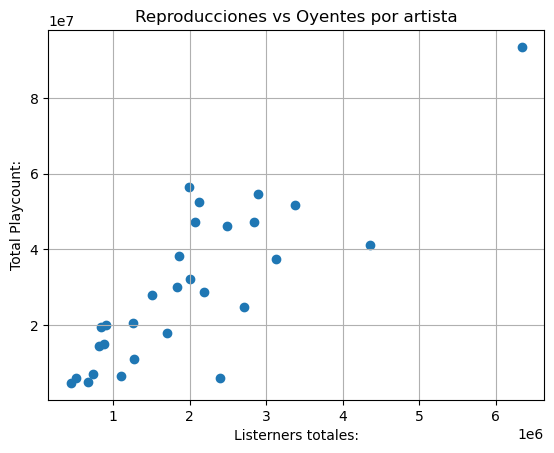

In [259]:
# Scatter plot
plt.figure()
plt.scatter(
    artist_agg["total_listeners"],
    artist_agg["total_playcount"]
)
plt.xlabel("Listerners totales:")
plt.ylabel("Total Playcount:")
plt.title("Reproducciones vs Oyentes por artista")
plt.grid()
plt.show()

In [260]:
_________________________________________________________________________________________________________________

NameError: name '_________________________________________________________________________________________________________________' is not defined

22. Correlación playcount vs listeners (tracks)

In [261]:
print(df.columns)

Index(['name', 'duration', 'playcount', 'listeners', 'artist'], dtype='object')


In [262]:
# Añandimos columna Ratio = playcount / listeners
artist_agg["ratio"] = (
    artist_agg["total_playcount"] / artist_agg["total_listeners"]
)

In [263]:
print(df.columns)

Index(['name', 'duration', 'playcount', 'listeners', 'artist'], dtype='object')


In [264]:
# Correlación Pearson (por canción)
pearson_corr_tracks = df["playcount"].corr(df["listeners"])

print("Correlación Pearson (playcount vs listeners, tracks):", pearson_corr_tracks)

Correlación Pearson (playcount vs listeners, tracks): 0.9086068976395149


In [265]:
# Normalizar columnas
df.columns = df.columns.str.strip().str.lower()

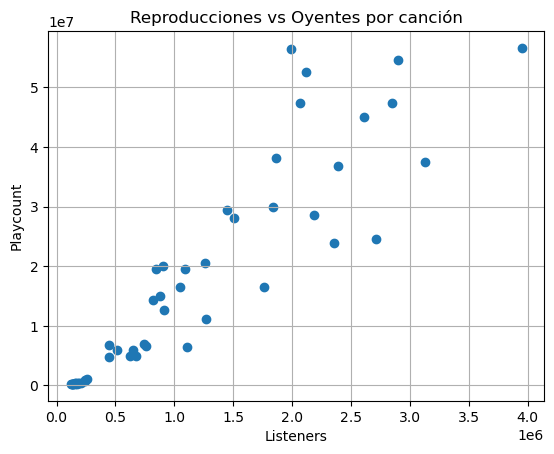

In [266]:
plt.figure()
plt.scatter(df["listeners"], df["playcount"])
plt.xlabel("Listeners")
plt.ylabel("Playcount")
plt.title("Reproducciones vs Oyentes por canción")

plt.grid()
plt.show()

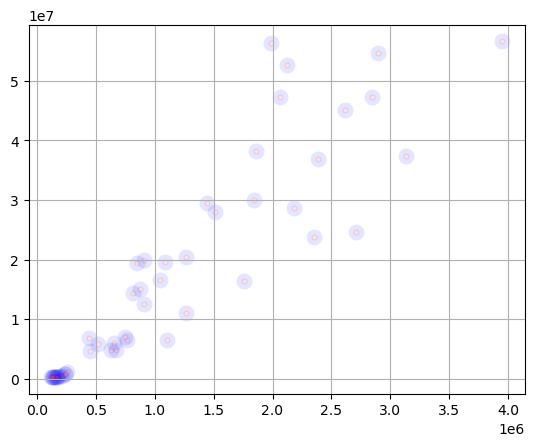

In [267]:
plt.scatter(df["listeners"],
            df["playcount"],
            alpha = 0.1,
            color = "red",
            marker = "o",
            edgecolors = "blue",
            s = 20,
            linewidths = 7)

plt.grid()
plt.show()

Cada punto es un artista. Se observa una tendencia creciente clara → correlación positiva.

________________________________________________________________________________________________________

23. Cálculo del ratio playcount/listeners (artistas)

In [268]:
## Agregar por artista
artist_agg = (
    df.groupby("artist", as_index=False)
      .agg(
          total_playcount=("playcount", "sum"),
          total_listeners=("listeners", "sum")
      )
)

In [269]:
# Calcular ratio playcount / listeners
artist_agg["playcount_listener_ratio"] = (
    artist_agg["total_playcount"] / artist_agg["total_listeners"]
)

In [270]:
# resultados
print(artist_agg.sort_values("playcount_listener_ratio", ascending=False))

               artist  total_playcount  total_listeners  \
5       Chappell Roan         56377941          1988806   
3       Billie Eilish         52560175          2122371   
20         Tate McRae         19504797           847472   
18            TV Girl         47306887          2065376   
21       Taylor Swift         19950287           904708   
27                bôa         38202113          1863894   
2      Arctic Monkeys         54670673          2895476   
9        Jeff Buckley         28048582          1510444   
23         The Marías         46051899          2487525   
1         Addison Rae         14346794           815574   
10            KATSEYE         15077806           877833   
24  The Neighbourhood         47316367          2846085   
6                 Djo         29970287          1839761   
28              sombr         20460559          1261400   
16  Sabrina Carpenter         32141357          1999455   
19        Tame Impala         51606497          3377694 

In [271]:
# Ordenar por ratio
artist_agg_sorted = artist_agg.sort_values(
    "playcount_listener_ratio",
    ascending=False
)

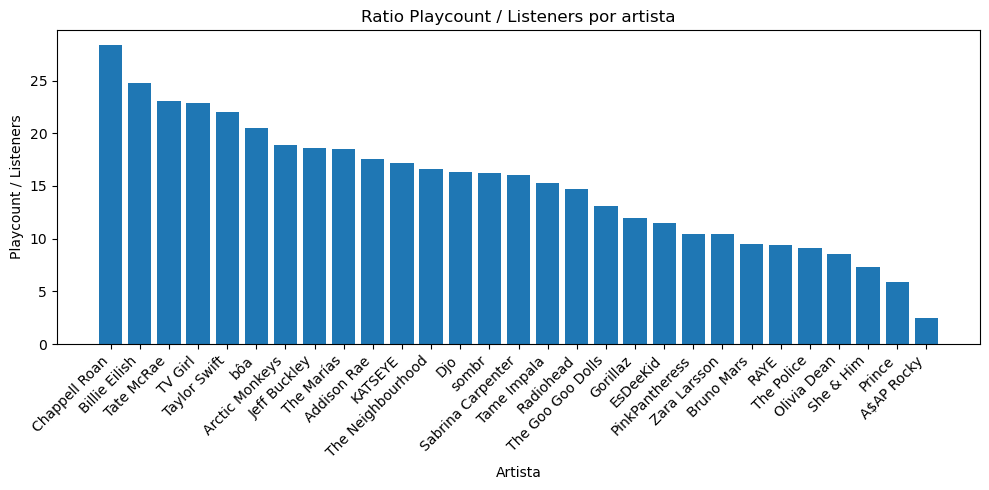

In [272]:
# Gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(
    artist_agg_sorted["artist"],
    artist_agg_sorted["playcount_listener_ratio"]
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Artista")
plt.ylabel("Playcount / Listeners")
plt.title("Ratio Playcount / Listeners por artista")
plt.tight_layout()
plt.show()

La correlación por canción suele ser:

Alta, pero

Menor que por artista

Esto ocurre porque:

Algunas canciones tienen muchos oyentes ocasionales

Otras tienen menos oyentes pero se reproducen muchas veces

_______________________________________________________________________________________________________________________________________________

24. Artistas con ratio alto

In [273]:
# Ratio playcount / listeners
artist_agg["ratio"] = (
    artist_agg["total_playcount"] / artist_agg["total_listeners"]
)

In [274]:
df["ratio"] = df["playcount"] / df["listeners"]

In [275]:
df_sorted = df.sort_values("ratio", ascending=False)

In [276]:
df_sorted

,name,duration,playcount,listeners,artist,ratio
23,"Good Luck, Babe!",218,56377941,1988806,Chappell Roan,28.347632
46,BIRDS OF A FEATHER,183,52560175,2122371,Billie Eilish,24.764838
43,Sports car,165,19504797,847472,Tate McRae,23.015270
42,Lovers Rock,213,47306887,2065376,TV Girl,22.904734
5,The Fate of Ophelia,226,19950287,904708,Taylor Swift,22.051631
38,Duvet,203,38202113,1863894,bôa,20.495861
25,No One Noticed,236,29476640,1443288,The Marías,20.423256
31,505,305,54670673,2895476,Arctic Monkeys,18.881411
22,"Lover, You Should've Come Over",403,28048582,1510444,Jeff Buckley,18.569760
28,Manchild,212,19536635,1090243,Sabrina Carpenter,17.919523


In [298]:
# Top 5 - Top 10
top5 = artist_agg.sort_values("ratio", ascending=False).head(5)
top10 = artist_agg.sort_values("ratio", ascending=False).head(10)

In [304]:
# artistas con ratio alto
high_ratio_artists = artist_agg[
    artist_agg["ratio"] > ratio_mean
].sort_values("ratio", ascending=False)

In [311]:
high_ratio_artists

,artist,total_playcount,total_listeners,playcount_listener_ratio,ratio
5,Chappell Roan,56377941,1988806,28.347632,28.347632
3,Billie Eilish,52560175,2122371,24.764838,24.764838
20,Tate McRae,19504797,847472,23.015270,23.015270
18,TV Girl,47306887,2065376,22.904734,22.904734
21,Taylor Swift,19950287,904708,22.051631,22.051631
27,bôa,38202113,1863894,20.495861,20.495861
2,Arctic Monkeys,54670673,2895476,18.881411,18.881411
9,Jeff Buckley,28048582,1510444,18.569760,18.569760
23,The Marías,46051899,2487525,18.513140,18.513140
1,Addison Rae,14346794,815574,17.591039,17.591039


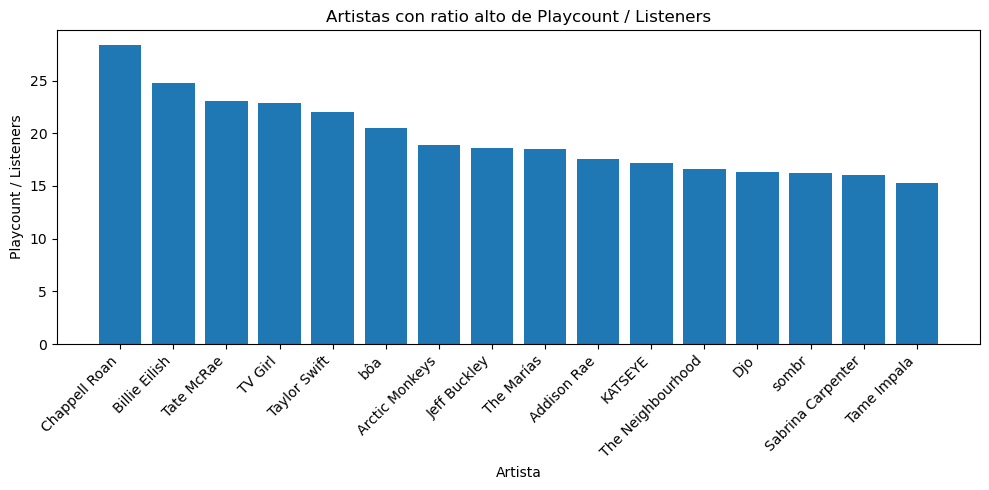

In [305]:
plt.figure(figsize=(10, 5))
plt.bar(
    high_ratio_artists["artist"],
    high_ratio_artists["ratio"]
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Artista")
plt.ylabel("Playcount / Listeners")
plt.title("Artistas con ratio alto de Playcount / Listeners")
plt.tight_layout()
plt.show()

Los artistas representados muestran un ratio superior a la media, lo que indica:

Mayor frecuencia de escucha por oyente

Audiencias más fieles

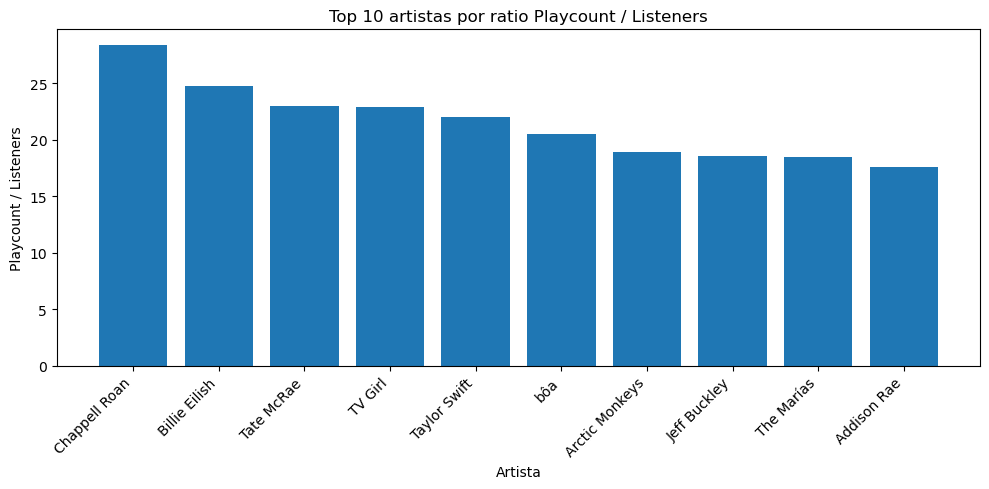

In [306]:
plt.figure(figsize=(10, 5))
plt.bar(top10["artist"], top10["ratio"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Artista")
plt.ylabel("Playcount / Listeners")
plt.title("Top 10 artistas por ratio Playcount / Listeners")
plt.tight_layout()
plt.show()

In [307]:
# Media del ratio
global_mean = artist_agg["ratio"].mean()

In [310]:
global_mean

np.float64(15.074958407596514)

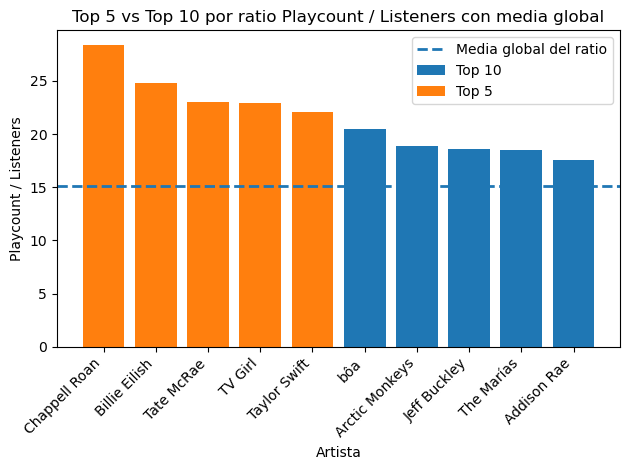

In [308]:
# Barras Top 10
plt.bar(top10["artist"], top10["ratio"], label="Top 10")
# Barras Top 5 
top5 = artist_agg.sort_values("ratio", ascending=False).head(5)
plt.bar(top5["artist"], top5["ratio"], label="Top 5")
# Línea de media global
plt.axhline(
    y=global_mean,
    linestyle="--",
    linewidth=2,
    label="Media global del ratio"
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Artista")
plt.ylabel("Playcount / Listeners")
plt.title("Top 5 vs Top 10 por ratio Playcount / Listeners con media global")
plt.legend()
plt.tight_layout()
plt.show()

______________________________________________________________________________________________________________________________________________________________

25. Cálculo del ratio playcount/listeners (tracks)

In [309]:
# ratio por track
df["ratio"] = df["playcount"] / df["listeners"]

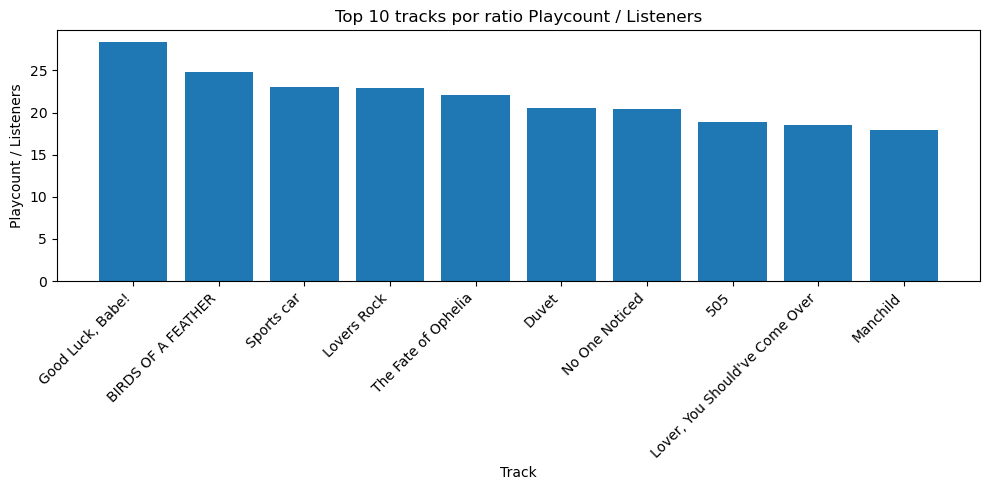

In [293]:
plt.figure(figsize=(10, 5))
plt.bar(top10_tracks["name"], top10_tracks["ratio"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Track")
plt.ylabel("Playcount / Listeners")
plt.title("Top 10 tracks por ratio Playcount / Listeners")
plt.tight_layout()
plt.show()

Un ratio alto por track indica:

Canciones muy reescuchadas

Posible efecto de repetición o “tema favorito”

A diferencia del análisis por artista:

Aquí se identifican canciones concretas, no audiencias fieles globales.

____________________________________________________________________________________________________________________

26. Canciones con escucha repetitiva

In [123]:
# Media global del ratio
mean_ratio = df["ratio"].mean()

In [124]:
repetitive_tracks = (
    df[df["ratio"] > mean_ratio]
    .sort_values("ratio", ascending=False)
)

In [125]:
print(repetitive_tracks[["name", "artist", "ratio"]])

                              name             artist      ratio
23                Good Luck, Babe!      Chappell Roan  28.347632
46              BIRDS OF A FEATHER      Billie Eilish  24.764838
43                      Sports car         Tate McRae  23.015270
42                     Lovers Rock            TV Girl  22.904734
5              The Fate of Ophelia       Taylor Swift  22.051631
38                           Duvet                bôa  20.495861
25                  No One Noticed         The Marías  20.423256
31                             505     Arctic Monkeys  18.881411
22  Lover, You Should've Come Over       Jeff Buckley  18.569760
28                        Manchild  Sabrina Carpenter  17.919523
4                    Fame Is a Gun        Addison Rae  17.591039
20      The Less I Know the Better        Tame Impala  17.227405
35                        Gabriela            KATSEYE  17.176167
39                 Sweater Weather  The Neighbourhood  16.625072
0                 End of 

In [126]:
top20_repetitive = repetitive_tracks.head(20)

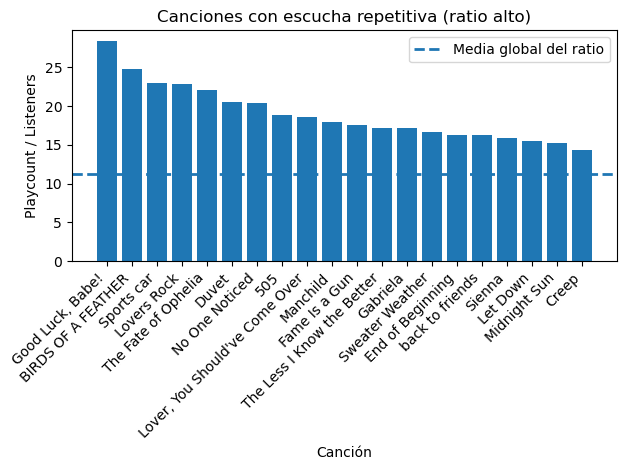

In [127]:
plt.bar(top20_repetitive["name"], top20_repetitive["ratio"])
# Línea de media global
plt.axhline(
    y=mean_ratio,
    linestyle="--",
    linewidth=2,
    label="Media global del ratio"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Canción")
plt.ylabel("Playcount / Listeners")
plt.title("Canciones con escucha repetitiva (ratio alto)")
plt.legend()
plt.tight_layout()
plt.show()

Las canciones representadas presentan un ratio playcount/listeners superior a la media, lo que indica:

Alta frecuencia de repetición

Mayor capacidad de retención por oyente

Estas canciones suelen corresponder a:

Temas “favoritos”

Canciones cortas o muy memorables

Reproducciones repetidas en corto periodo de tiempo

__________________________________________________________________________________________________________

27. Comparación del ratio medio artistas vs tracks

In [139]:
#  Ratio por track
df["ratio"] = df["playcount"] / df["listeners"]

In [140]:
track_mean_ratio = df["ratio"].mean()

In [141]:
artist_agg = (
    df.groupby("artist")
      .agg(
          tracks=("name", "count"),
          playcount=("playcount", "sum"),
          listeners=("listeners", "sum")
      )
)
artist_agg["ratio_total"] = artist_agg["playcount"] / artist_agg["listeners"]

In [142]:
artist_agg["ratio_mean_track"] = df.groupby("artist")["ratio"].mean()

In [145]:
# Promedios artista
artist_mean_total = artist_agg["ratio_total"].mean()
artist_mean_trackmean = artist_agg["ratio_mean_track"].mean()

In [156]:
summary = pd.DataFrame({
    "Nivel": ["Tracks", "Artistas"],
    "Ratio medio (media simple)": [track_mean_ratio, artist_mean_trackmean],
    "Ratio medio (ratio total)": [np.nan, artist_mean_total]
})

print("\n=== Comparación ratio medio artistas vs tracks ===")
print(summary.round(3))


=== Comparación ratio medio artistas vs tracks ===
      Nivel  Ratio medio (media simple)  Ratio medio (ratio total)
0    Tracks                      11.248                        NaN
1  Artistas                      14.967                     15.075


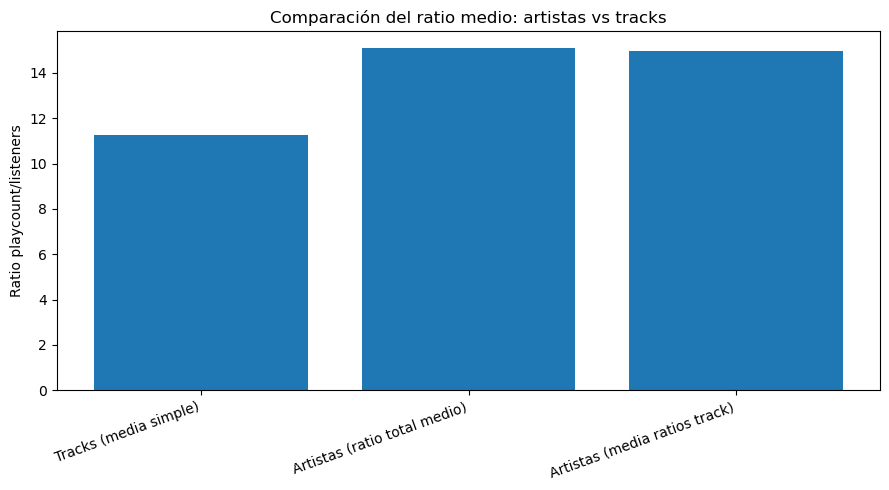

In [147]:
labels = [
    "Tracks (media simple)",
    "Artistas (ratio total medio)",
    "Artistas (media ratios track)"
]
values = [track_mean_ratio, artist_mean_total, artist_mean_trackmean]

plt.figure(figsize=(9, 5))
plt.bar(labels, values)
plt.ylabel("Ratio playcount/listeners")
plt.title("Comparación del ratio medio: artistas vs tracks")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()

Los usuarios no escuchan tracks aislados únicamente, sino que tienden a:
-epetir artistas
-escuchar varias canciones del mismo artista
-mostrar fidelización 

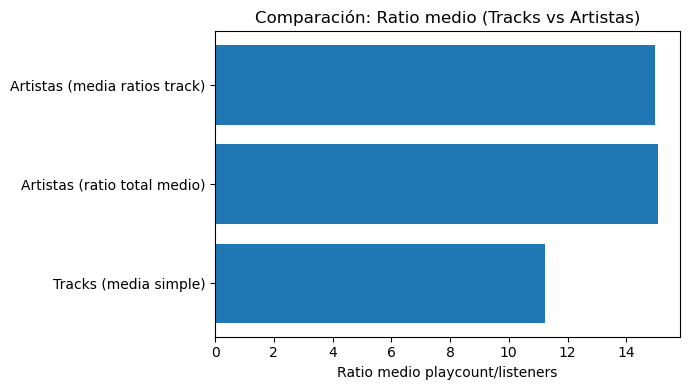

In [154]:
plt.figure(figsize=(7, 4))
plt.barh(labels, values)
plt.xlabel("Ratio medio playcount/listeners")
plt.title("Comparación: Ratio medio (Tracks vs Artistas)")
plt.tight_layout()
plt.show()


Este grafico identifica que el consumo se vuelve más repetitivo cuando analizamos el artista completo en lugar de canciones sueltas.


________________________________________________________________________________________________________________________________________

28. Scatter plots con outliers

In [157]:
df = df.dropna(subset=["playcount", "listeners", "artist", "name"])
df = df[df["listeners"] > 0].copy()

In [158]:
df["ratio"] = df["playcount"] / df["listeners"]

In [159]:
low_thr = df["ratio"].quantile(0.05)
high_thr = df["ratio"].quantile(0.95)

In [160]:
df["is_outlier"] = (df["ratio"] <= low_thr) | (df["ratio"] >= high_thr)

In [161]:
print(f"Umbral inferior (5%): {low_thr:.3f}")
print(f"Umbral superior (95%): {high_thr:.3f}")
print("Nº outliers:", df["is_outlier"].sum())

Umbral inferior (5%): 1.982
Umbral superior (95%): 22.966
Nº outliers: 6


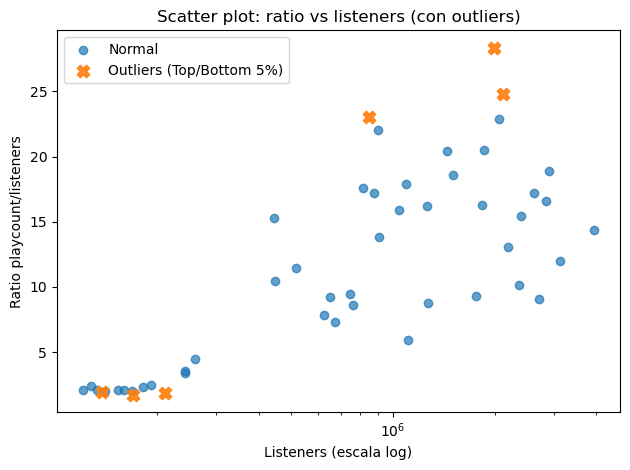

In [164]:
plt.scatter(
    df.loc[~df["is_outlier"], "listeners"],
    df.loc[~df["is_outlier"], "ratio"],
    alpha=0.7,
    label="Normal"
)

# outliers
plt.scatter(
    df.loc[df["is_outlier"], "listeners"],
    df.loc[df["is_outlier"], "ratio"],
    alpha=0.9,
    marker="X",
    s=80,
    label="Outliers (Top/Bottom 5%)")

plt.xscale("log")  
plt.xlabel("Listeners (escala log)")
plt.ylabel("Ratio playcount/listeners")
plt.title("Scatter plot: ratio vs listeners (con outliers)")
plt.legend()
plt.tight_layout()
plt.show()

Este grafico con Oultliers, grafica en la parte superior aparecen tracks con alta fidelización (mucha repetición por usuario), mientras que en la parte inferior se observan tracks de consumo ocasional o superficial.

____________________________________________________________________________________________________________________________

29. Identificación de patrones de consumo

In [167]:
df = df.dropna(subset=["playcount", "listeners", "artist", "name"])
df = df[df["listeners"] > 0].copy()

In [168]:
df["ratio"] = df["playcount"] / df["listeners"]

In [169]:
df["log_listeners"] = np.log10(df["listeners"])
df["log_playcount"] = np.log10(df["playcount"])

In [170]:
features = df[["log_listeners", "log_playcount", "ratio"]].copy()

In [173]:
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [174]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X)

In [175]:
cluster_summary = df.groupby("cluster").agg(
    n_tracks=("name", "count"),
    mean_listeners=("listeners", "mean"),
    mean_playcount=("playcount", "mean"),
    mean_ratio=("ratio", "mean"),
    median_ratio=("ratio", "median"),
).round(2)

print("\n=== Resumen de patrones (clusters) ===")
print(cluster_summary)


=== Resumen de patrones (clusters) ===
         n_tracks  mean_listeners  mean_playcount  mean_ratio  median_ratio
cluster                                                                    
0              11      2607001.82     36497032.27       13.85         14.34
1              15       175951.00       453388.67        2.43          2.09
2              11       740528.00      7002026.91        9.83          9.24
3              13      1371972.77     29032651.92       20.41         20.42


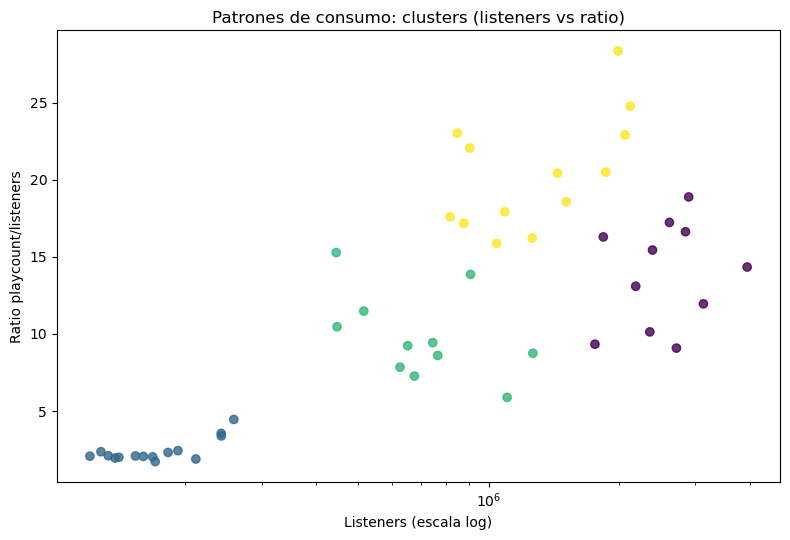

In [184]:
plt.figure(figsize=(8, 5.5))
plt.scatter(df["listeners"], df["ratio"], c=df["cluster"], alpha=0.8)

plt.xscale("log")
plt.xlabel("Listeners (escala log)")
plt.ylabel("Ratio playcount/listeners")
plt.title("Patrones de consumo: clusters (listeners vs ratio)")
plt.tight_layout()
plt.show()


Cluster 0: alto listeners + ratio medio → hits estables

Cluster 1: alto listeners + ratio bajo → viral/casual

Cluster 2: listeners bajos + ratio alto → nicho repetitivo

Cluster 3: listeners bajos + ratio bajo → nicho ocasional

Es decir: el mercado no se explica solo por popularidad, sino por la combinación de alcance y fidelización.

In [ ]:
__________________________________________________________________________________________________________________________

Ejercicio Especial, haciendo un resumen de todos los ejercicios anteriores y poniendo en practica "Dashboard de análisis: consumo musical (tracks vs artistas)"

In [197]:
artist_agg = df.groupby("artist").agg(
    n_tracks=("name", "count"),
    total_playcount=("playcount", "sum"),
    total_listeners=("listeners", "sum"),
)
artist_agg["ratio_total"] = artist_agg["total_playcount"] / artist_agg["total_listeners"]
artist_agg["ratio_mean_track"] = df.groupby("artist")["ratio"].mean()

In [206]:
track_mean_ratio = df["ratio"].mean()
artist_mean_total = artist_agg["ratio_total"].mean()
artist_mean_trackmean = artist_agg["ratio_mean_track"].mean()

In [207]:
low_thr = df["ratio"].quantile(0.05)
high_thr = df["ratio"].quantile(0.95)
df["is_outlier"] = (df["ratio"] <= low_thr) | (df["ratio"] >= high_thr)

In [208]:
df["log_listeners"] = np.log10(df["listeners"])
df["log_playcount"] = np.log10(df["playcount"])
features = df[["log_listeners", "log_playcount", "ratio"]].copy()

In [209]:
X = StandardScaler().fit_transform(features)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X)

In [210]:
artist_stats = artist_agg.reset_index().copy()


In [211]:
artist_stats.columns

Index(['artist', 'n_tracks', 'total_playcount', 'total_listeners',
       'ratio_total', 'ratio_mean_track'],
      dtype='object')

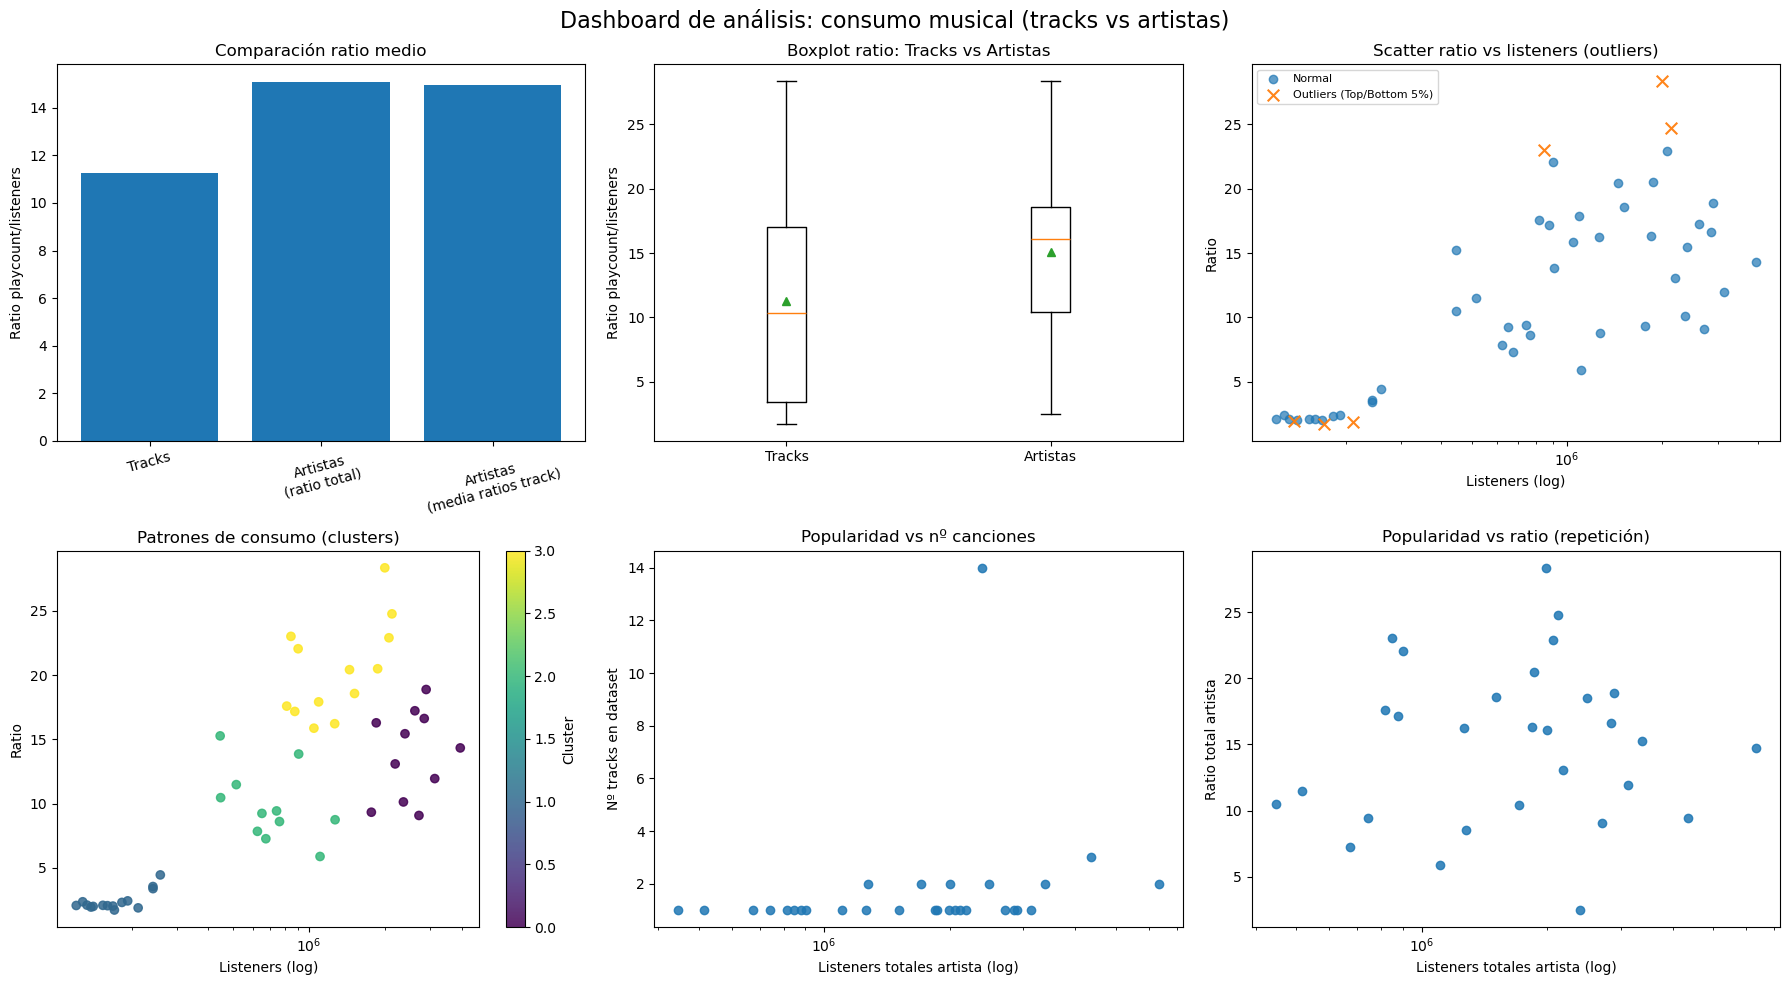

<Figure size 640x480 with 0 Axes>

In [212]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Dashboard de análisis: consumo musical (tracks vs artistas)", fontsize=16)
ax = axes[0, 0]
labels = ["Tracks", "Artistas\n(ratio total)", "Artistas\n(media ratios track)"]
values = [track_mean_ratio, artist_mean_total, artist_mean_trackmean]
ax.bar(labels, values)
ax.set_title("Comparación ratio medio")
ax.set_ylabel("Ratio playcount/listeners")
ax.tick_params(axis="x", rotation=15)
ax = axes[0, 1]
ax.boxplot(
    [df["ratio"].values, artist_agg["ratio_total"].values],
    tick_labels=["Tracks", "Artistas"],
    showmeans=True
)
ax.set_title("Boxplot ratio: Tracks vs Artistas")
ax.set_ylabel("Ratio playcount/listeners")

ax = axes[0, 2]
ax.scatter(
    df.loc[~df["is_outlier"], "listeners"],
    df.loc[~df["is_outlier"], "ratio"],
    alpha=0.7,
    label="Normal"
)

ax.scatter(
    df.loc[df["is_outlier"], "listeners"],
    df.loc[df["is_outlier"], "ratio"],
    alpha=0.95,
    marker="x",
    s=70,
    label="Outliers (Top/Bottom 5%)"
)

ax.set_xscale("log")
ax.set_title("Scatter ratio vs listeners (outliers)")
ax.set_xlabel("Listeners (log)")
ax.set_ylabel("Ratio")
ax.legend(fontsize=8)

ax = axes[1, 0]
scatter = ax.scatter(df["listeners"], df["ratio"], c=df["cluster"], alpha=0.85)
ax.set_xscale("log")
ax.set_title("Patrones de consumo (clusters)")
ax.set_xlabel("Listeners (log)")
ax.set_ylabel("Ratio")
# colorbar para clusters
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label("Cluster")

# -------------------------------------------------------
# (5) Popularidad artista vs nº canciones
# -------------------------------------------------------
ax = axes[1, 1]
ax.scatter(artist_stats["total_listeners"], artist_stats["n_tracks"], alpha=0.85)
ax.set_xscale("log")
ax.set_title("Popularidad vs nº canciones")
ax.set_xlabel("Listeners totales artista (log)")
ax.set_ylabel("Nº tracks en dataset")

# -------------------------------------------------------
# (6) Popularidad artista vs ratio
# -------------------------------------------------------
ax = axes[1, 2]
ax.scatter(artist_stats["total_listeners"], artist_agg["ratio_total"], alpha=0.85)
ax.set_xscale("log")
ax.set_title("Popularidad vs ratio (repetición)")
ax.set_xlabel("Listeners totales artista (log)")
ax.set_ylabel("Ratio total artista")

plt.tight_layout()
plt.show()

ax = axes[1, 0]
scatter = ax.scatter(df["listeners"], df["ratio"], c=df["cluster"], alpha=0.85)
ax.set_xscale("log")
ax.set_title("Patrones de consumo (clusters)")
ax.set_xlabel("Listeners (log)")
ax.set_ylabel("Ratio")
# colorbar para clusters
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label("Cluster")

ax = axes[1, 1]
ax.scatter(artist_stats["total_listeners"], artist_stats["n_tracks"], alpha=0.85)
ax.set_xscale("log")
ax.set_title("Popularidad vs nº canciones")
ax.set_xlabel("Listeners totales artista (log)")
ax.set_ylabel("Nº tracks en dataset")

ax = axes[1, 2]
ax.scatter(artist_stats["total_listeners"], artist_agg["ratio_total"], alpha=0.85)
ax.set_xscale("log")
ax.set_title("Popularidad vs ratio (repetición)")
ax.set_xlabel("Listeners totales artista (log)")
ax.set_ylabel("Ratio total artista")

plt.tight_layout()
plt.show()

In [205]:
print(artist_stats.columns)

Index(['artist', 'n_tracks', 'total_playcount', 'total_listeners',
       'ratio_total', 'ratio_mean_track'],
      dtype='object')
